In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('inv_pharma_wIPC.csv')

In [7]:
df.head()

,app_nbr,appln_id,person_id,inv_name,address,reg_code,ctry_code,prio_year,app_year,IPC
0,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,A61K038/21
1,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C07K014/555
2,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C12P021/00
3,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61K038/00
4,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61P001/12


### Descriptive Analysis 

Remove duplicates due to multiple IPC and author.

In [10]:
df_da = df[['app_nbr','reg_code','prio_year']]
df_da.head()

,app_nbr,reg_code,prio_year
0,EP19780100395,UKJ42,1977
1,EP19780100395,UKJ42,1977
2,EP19780100395,UKJ42,1977
3,EP19780100463,UKJ42,1977
4,EP19780100463,UKJ42,1977


In [12]:
df_da = df_da.drop_duplicates()
df_da.head()

,app_nbr,reg_code,prio_year
0,EP19780100395,UKJ42,1977
3,EP19780100463,UKJ42,1977
11,EP19780100669,UKI22,1977
14,EP19780100690,UKH23,1977
23,EP19780100717,UKI23,1977


In [13]:
print("Before dropping, "+ str(len(df)) +" rows.")
print("After dropping, "+ str(len(df_da)) +" rows.")

Before dropping, 207766 rows.
After dropping, 31282 rows.


In [28]:
# Convert 'prio_year' to integer
df_da['prio_year'] = df_da['prio_year'].astype(int)

# Get the range of years
years = df_da['prio_year'].unique()

# Initialize an empty DataFrame to store the results
results = {}

# Loop over each year
for year in years:
    # Filter the data for the current year
    df_year = df_da[df_da['prio_year'] == year]
    
    # Calculate the total number of patents for each region
    total_patents_per_region = df_year.groupby('reg_code')['app_nbr'].nunique()
    
    # Calculate the total number of patents for the year
    total_patents = df_year['app_nbr'].nunique()
    
    # Get descriptive statistics
    desc_stats = total_patents_per_region.describe()
    
    # Add the total number of patents to the descriptive statistics
    desc_stats = desc_stats.append(pd.Series(total_patents, index=['total_patents']))
    
    # Append the results to the results dictionary
    results[year] = desc_stats

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                    1977        1978        1979        1980        1981  \
count          22.000000   35.000000   36.000000   42.000000   46.000000   
mean            3.727273    5.800000    6.000000    5.428571    6.478261   
std             4.014045    8.463764    8.802597    7.893013    9.052290   
min             1.000000    1.000000    1.000000    1.000000    1.000000   
25%             1.000000    1.000000    1.000000    1.000000    1.000000   
50%             1.500000    2.000000    2.000000    2.000000    3.000000   
75%             5.000000    4.500000    6.250000    5.750000    6.750000   
max            17.000000   36.000000   38.000000   36.000000   43.000000   
total_patents  82.000000  203.000000  216.000000  228.000000  298.000000   

                     1982        1983        1984        1985        1986  \
count           50.000000   56.000000   61.000000   63.000000   75.000000   
mean             5.900000    6.357143    5.901639    6.698413    6.906667   
std     

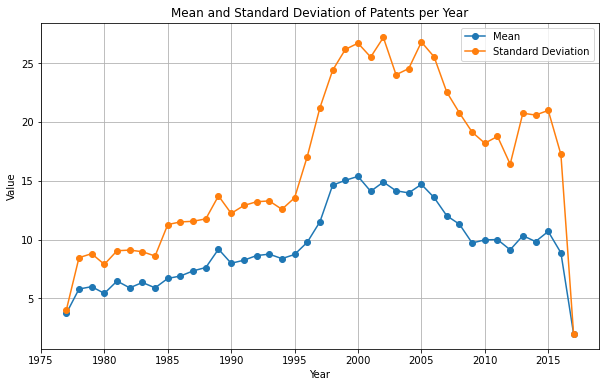

In [29]:
# Plot the count and standard deviation statistics
plt.figure(figsize=(10, 6))
plt.plot(results_df.loc['mean'], marker='o', label='Mean')
plt.plot(results_df.loc['std'], marker='o', label='Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation of Patents per Year')
plt.legend()
plt.grid(True)
plt.show()

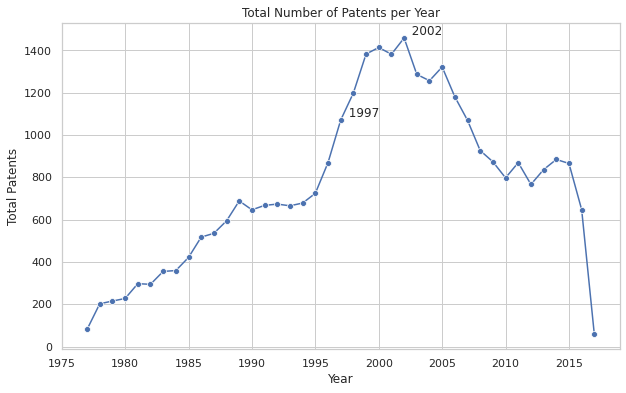

In [32]:
# Calculate the change in total patents compared to the previous year
results_df.loc['change'] = results_df.loc['total_patents'].diff()

# Find the year with the highest total patents
max_patents_year = results_df.loc['total_patents'].idxmax()

# Find the year with the highest change in total patents
max_change_year = results_df.loc['change'].idxmax()

# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=results_df.columns, y=results_df.loc['total_patents'], marker='o', ax=ax)

# Add a label for the year with the highest total patents
ax.text(max_patents_year, results_df.loc['total_patents', max_patents_year], f'  {max_patents_year}', verticalalignment='bottom')

# Add a label for the year with the highest change in total patents
ax.text(max_change_year, results_df.loc['total_patents', max_change_year], f'  {max_change_year}', verticalalignment='bottom')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Patents')
ax.set_title('Total Number of Patents per Year')

plt.show()


In [33]:
# Add the change in total patents to results_df
results_df.loc['change'] = results_df.loc['total_patents'].diff()
print(results_df)


                    1977        1978        1979        1980        1981  \
count          22.000000   35.000000   36.000000   42.000000   46.000000   
mean            3.727273    5.800000    6.000000    5.428571    6.478261   
std             4.014045    8.463764    8.802597    7.893013    9.052290   
min             1.000000    1.000000    1.000000    1.000000    1.000000   
25%             1.000000    1.000000    1.000000    1.000000    1.000000   
50%             1.500000    2.000000    2.000000    2.000000    3.000000   
75%             5.000000    4.500000    6.250000    5.750000    6.750000   
max            17.000000   36.000000   38.000000   36.000000   43.000000   
total_patents  82.000000  203.000000  216.000000  228.000000  298.000000   
change               NaN  121.000000   13.000000   12.000000   70.000000   

                     1982        1983        1984        1985        1986  \
count           50.000000   56.000000   61.000000   63.000000   75.000000   
mean     